<a href="https://colab.research.google.com/github/kumoromilee/bsc_dpdm22/blob/main/Classificaion_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#นำเข้าข้อมูล digits
from sklearn.datasets import load_digits
digits = load_digits()
#print(digits.data.shape)

import matplotlib.pyplot as plt

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

8


<Figure size 432x288 with 0 Axes>

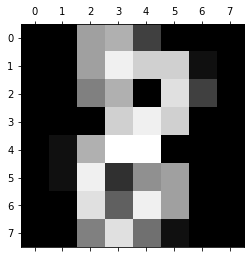

In [3]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

##  Quiz 3 march

1.   แบ่ง data ออกเป็น 80train 20 test โดยใช้ random_state = 9
2.   หา parameters ที่ดีที่สุด (K (1,3,5))distance_weighted(yes/no) ด้วย 10-fold-cross-valkidation
3. test parameters ที่ดีที่สุดกับ test data



## 1 set test set train

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1437, 64) (1437,)
Testing set shape: (360, 64) (360,)


## 2 with distance_weighted

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Define the distance-weighted k-NN classifier with different values of k
k_values = [1, 3, 5]
classifiers = [KNeighborsClassifier(n_neighbors=k, weights='distance') for k in k_values]

# Perform 10-fold cross-validation for each classifier
for i, clf in enumerate(classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("K =", k_values[i], "Accuracy:", scores.mean())

K = 1 Accuracy: 0.985402097902098
K = 3 Accuracy: 0.9853875291375293
K = 5 Accuracy: 0.9839986402486403


### without distance_weighted

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Define the k values to use
k_values = [1, 3, 5]

# Perform 10-fold cross-validation for each value of k
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform') # uniform โดนสุ่มเท่ากัน
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("K =", k, "Accuracy:", scores.mean())

K = 1 Accuracy: 0.985402097902098
K = 3 Accuracy: 0.9846882284382286
K = 5 Accuracy: 0.982600038850039


# เลือก k 3 with distance weighted


test parameters ที่ดีที่สุดกับ test data

In [7]:
# Fit a k-NN classifier with k=3 and distance-weighted voting
clf = KNeighborsClassifier(n_neighbors=1, weights='distance')
clf.fit(X_train, y_train)

# Predict the class labels of the test set
pred = clf.predict(X_test)

# Compute the accuracy of the classifier
acc = clf.score(X_test, y_test)

In [8]:
acc

0.9861111111111112

# เฉลย Quiz 1

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# model 1 (K=1, weighted)
knn_distance= KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print(f'Mean Cross-Validation Score: K1weihted', scores.mean())

# model 2 (K=3, weighted)
knn_distance= KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print(f'Mean Cross-Validation Score:  K3weihted', scores.mean())

# model 3 (K=5, weighted)
knn_distance= KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print(f'Mean Cross-Validation Score:  K5weihted', scores.mean())

# model 1 (K=1, weighted)
knn_distance= KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print(f'Mean Cross-Validation Score: K1weihted', scores.mean())

# model 2 (K=3, weighted)
knn_distance= KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print(f'Mean Cross-Validation Score:  K3weihted', scores.mean())

# model 3 (K=5, weighted)
knn_distance= KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print(f'Mean Cross-Validation Score:  K5weihted', scores.mean())

Mean Cross-Validation Score: K1weihted 0.985402097902098
Mean Cross-Validation Score:  K3weihted 0.9853875291375293
Mean Cross-Validation Score:  K5weihted 0.9839986402486403
Mean Cross-Validation Score: K1weihted 0.985402097902098
Mean Cross-Validation Score:  K3weihted 0.9846882284382286
Mean Cross-Validation Score:  K5weihted 0.982600038850039


# Evaluate with test set

In [13]:
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)


Accuracy score:  0.9861111111111112


#HW 7
หา โมเดลที่ดีที่สุด จาก Decision tree ,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the digits dataset 
digits = load_digits()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

In [16]:
# Decision Tree
# define
dt1 = DecisionTreeClassifier(max_depth=5,random_state=2) #with max depth = 5
dt2 = DecisionTreeClassifier(random_state=2)

# Fit a decision tree classifier 
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)

# Predict the class labels of the test set
pred_dt1 = dt1.predict(X_test)
pred_dt2 = dt2.predict(X_test)

# Compute the accuracy of the classifier
acc_dt1 = accuracy_score(y_test, pred_dt1)
acc_dt2 = accuracy_score(y_test, pred_dt2)
print("Decision Tree1 Accuracy:", acc_dt1)
print("Decision Tree2 Accuracy:", acc_dt2)

# Naive Bayes
# define
nb1 = GaussianNB()
nb2 = GaussianNB(var_smoothing=0.1)

# Fit a Gaussian Naive Bayes classifier
nb1.fit(X_train, y_train)
nb2.fit(X_train, y_train)

# Predict the class labels of the test set
pred_nb1 = nb1.predict(X_test)
pred_nb2 = nb2.predict(X_test)

# Compute the accuracy of the classifier
acc_nb1 =  accuracy_score(y_test, pred_nb1)
acc_nb2 =  accuracy_score(y_test, pred_nb2)
print("Naive Bayes1 Accuracy:", acc_nb1)
print("Naive Bayes2 Accuracy:", acc_nb2)

# KNN k neighbor nearest
# Create a k-NN classifier with k=3 
knn1 = KNeighborsClassifier(n_neighbors=3, weights='distance') #distance weighting
knn2 = KNeighborsClassifier(n_neighbors=3, weights='uniform') # uniform weighting

# Fit the classifier to the training data
knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)

# Predict the class labels of the test set
pred_knn1 = knn1.predict(X_test)
pred_knn2 = knn2.predict(X_test)

# Compute the accuracy of the k-NN classifier
acc_knn1 = accuracy_score(y_test, pred_knn1)
acc_knn2 = accuracy_score(y_test, pred_knn2)
print("KNN1 Accuracy:", acc_knn1)
print("KNN2 Accuracy:", acc_knn2)

# ANN Artificial neural network
# Create an ANN classifier with one hidden layer of 100 neurons
ann1 = MLPClassifier(hidden_layer_sizes=(100,), random_state=2)
ann2 = MLPClassifier(hidden_layer_sizes=(100,50), random_state=2)

# Fit the classifier to the training data
ann1.fit(X_train, y_train)
ann2.fit(X_train, y_train)

# Predict the class labels of the test set
pred_ann1 = ann1.predict(X_test)
pred_ann2 = ann2.predict(X_test)

# Compute the accuracy of the classifier
acc_ann1 = accuracy_score(y_test, pred_ann1)
acc_ann2 = accuracy_score(y_test, pred_ann2)
print("ANN1 Accuracy:", acc_ann1)
print("ANN2 Accuracy:", acc_ann2)

Decision Tree1 Accuracy: 0.6666666666666666
Decision Tree2 Accuracy: 0.8361111111111111
Naive Bayes1 Accuracy: 0.8472222222222222
Naive Bayes2 Accuracy: 0.8861111111111111
KNN1 Accuracy: 0.9833333333333333
KNN2 Accuracy: 0.9861111111111112
ANN1 Accuracy: 0.9611111111111111
ANN2 Accuracy: 0.9638888888888889
